# Matplotlib Exercise 1

This is a demonstration of producing a particular complex graphic using matplotlib. The final image is shown below
<img src="./complex_diagram.png" alt="Drawing" style="width: 600px;"/>
It shows the trajectory of a pair of drops in a confined shear flow.

The things that make  up this image are as follows
1. The red drop is available as a png [image](transparent_drop.png).
<img src="./transparent_drop.png" alt="Drop with transparent background" style="width: 100px;"/>

2. The black curve showing the drop trajectory is from a [data file](./data.dat)

3. The blue curves are Bezier curves

We start with importing the required packages and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
from matplotlib.path import Path


The data is loaded and processed to get the trajectories. The data file contains the relative trajectory and is in units of radius of the undeformed drop. We divide it up among two drops to get their absolute trajectories and re-scale it to be in units of diameter.

In [2]:
data=np.loadtxt('./data.dat')

data[:,1:]*=(0.5*0.5)
data[:,1]-=0.4
p1= data[:,:3] #trajectory of drop1
p2=-data[:,:3] #trajectory of drop2
p2[:,0]=data[:,0]

We start with plotting the trajectory of the drops

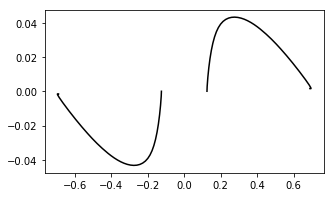

In [3]:
fig,ax=plt.subplots(figsize=(5,3))

_=ax.plot( p1[:,1], p1[:,2],'k',zorder=10)
_=ax.plot( p2[:,1], p2[:,2],'k',zorder=10)
plt.show()

Remove the ticks and tick labels. Remove the left and right border lines. Set the axis limits and add axis labels.

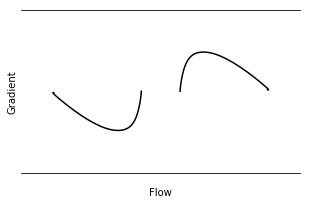

In [4]:
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlim([-0.9,0.9])
ax.set_ylim([-0.09,0.09])

ax.set_ylabel('Gradient')
ax.set_xlabel('Flow',labelpad=14)
fig

The image of the drop in read-in at this point. It is loaded in as a numpy array shaped MxNx4, MxN is the pixel resolution of the image with four data values per pixel. The last place of the four is the alpha value which sets the transparency.
We want to plot some drops looking transparent. The background of the drop is already transparent. We make a copy of the drop image and make a translucent one taking care to ensure that the background continues to be fully transparent. The `OffsetImage` gives us a object that we can plot in our figure

In [5]:
# read the drop image, make an additional transparent image
img1=plt.imread('transparent_drop.png')
img2=img1.copy()

mask = np.isclose(img2[:, :, -1],0)
img2[:, :, -1] = 0.5 #sets alpha = 0.5 every where including the background where it was zero. This is fixed next
img2[mask]=0.0

drop_marker1=OffsetImage(img1,zoom=0.06)
drop_marker2=OffsetImage(img2,zoom=0.06)

Now we identify the points where we want to have the drops  and arrows along the black curve

In [6]:
l=len(data)

#points for drawing drop images
i1,i2,i3,i4=0,int(0.06*l),int(0.15*l),-1

#points for drawing arrows on the curve
a1=int(0.033*l)
a2=int(0.033*l)

Now we plot all the drops

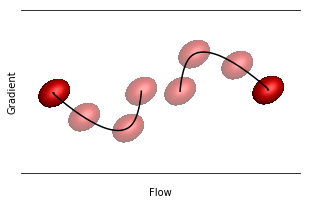

In [7]:
ax.add_artist(AnnotationBbox(drop_marker2, (p1[i1,1], p1[i1,2]), frameon=False))
ax.add_artist(AnnotationBbox(drop_marker2, (p2[i1,1], p2[i1,2]), frameon=False))

ax.add_artist(AnnotationBbox(drop_marker2, (p1[i2,1], p1[i2,2]), frameon=False))
ax.add_artist(AnnotationBbox(drop_marker2, (p2[i2,1], p2[i2,2]), frameon=False))

ax.add_artist(AnnotationBbox(drop_marker2, (p1[i3,1], p1[i3,2]), frameon=False))
ax.add_artist(AnnotationBbox(drop_marker2, (p2[i3,1], p2[i3,2]), frameon=False))

ax.add_artist(AnnotationBbox(drop_marker1, (p1[i4,1], p1[i4,2]), frameon=False))
ax.add_artist(AnnotationBbox(drop_marker1, (p2[i4,1], p2[i4,2]), frameon=False))
fig

Add arrows to the black lines between the first and second drops

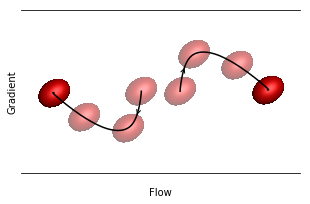

In [8]:
ax.annotate('', xy=(( p1[a1,1], p1[a1,2])), xycoords='data', 
            xytext=( p1[a1-1,1], p1[a1-1,2]),
            arrowprops=dict(arrowstyle='->',color='k'))
ax.annotate('', xy=(( p2[a2,1], p2[a2,2])), xycoords='data',
            xytext=( p2[a2-1,1], p2[a2-1,2]), 
            arrowprops=dict(arrowstyle='->',color='k'))
fig

add the wall migration effect arrow and text.

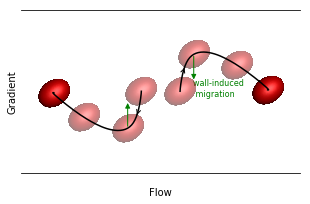

In [9]:
_=ax.text(0.21,-0.005, 'wall-induced \n migration',color='g',fontsize=8)
ax.annotate('', xy=(p1[i2,1], p1[i2,2]-0.03), xycoords='data',
            xytext=(p1[i2,1], p1[i2,2]), 
            arrowprops=dict(arrowstyle='-|>',fill=True,color='g'),
            horizontalalignment='center',zorder=4)
ax.annotate('', xy=(p2[i2,1], p2[i2,2]+0.03), xycoords='data',
            xytext=(p2[i2,1], p2[i2,2]), 
            arrowprops=dict(arrowstyle='-|>',fill=True,color='g'),
            horizontalalignment='center',zorder=4)
fig

Add the top and bottom wall, and arrows indication the direction of motion of the walls (and Gradient direction arrow). The walls are hatched rectangles

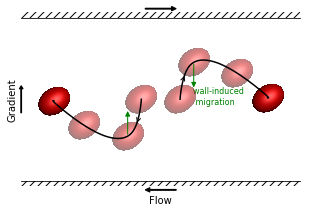

In [10]:
#flow gradient arrow
ax.arrow(-0.1, 0.1,0.2,0,fc='k',ec='k',
         head_width=0.005,head_length=.03,width=.001,
         length_includes_head=True,clip_on=False) 
ax.arrow( 0.1,-0.1,-0.2,0,fc='k',ec='k',
         head_width=0.005,head_length=.03,width=.001,
         length_includes_head=True,clip_on=False) 
ax.arrow(-0.9,-0.015,0.0,0.03,fc='k',ec='k',
         head_width=0.025,head_length=.0035,width=.005,
         length_includes_head=True,clip_on=False) 

## Rectangles for walls
ax.add_artist(plt.Rectangle((-0.9,0.09), 1.8, 0.006, linewidth=0, fill=None, hatch='///',clip_on=False))
ax.add_artist(plt.Rectangle((-0.9,-0.096), 1.8, 0.006, linewidth=0, fill=None, hatch='///',clip_on=False))
fig

define and plot Bezier curves for the two other light colored curves. These are qualitative curves

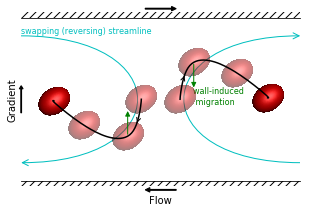

In [11]:
#paths for swapping trajact

verts = [
    (-0.9, 0.07), 
    ( 0.1, 0.07), 
    ( 0.1,-0.07), 
    (-0.9,-0.07), 
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)
patch = patches.FancyArrowPatch(path=Path(verts,codes),arrowstyle="->,head_length=6,head_width=3",linestyle='-',color='C',)
ax.add_patch(patch)

verts = [
    (  0.9,-0.07), 
    ( -0.1,-0.07), 
    ( -0.1, 0.07), 
    (  0.9, 0.07), 
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)
patch = patches.FancyArrowPatch(path=Path(verts,codes),arrowstyle="->,head_length=6,head_width=3",linestyle='-',color='C',)
ax.add_patch(patch)

ax.text(-0.9,0.073, 'swapping (reversing) streamline',color='C',fontsize=8)
fig

Finally draw some lines and arrows to mark the distance between the drops.

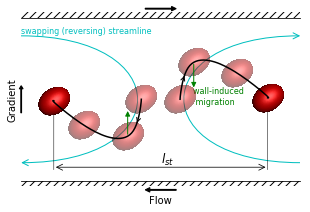

In [12]:
ax.add_patch(patches.FancyArrowPatch((p1[i4,1],-0.075),(p2[i4,1],-0.075),
                                     path=None,arrowstyle="<->,head_length=6,head_width=3",
                                     color='k',linewidth=0.75))

ax.add_patch(patches.FancyArrowPatch((p1[i4,1],-0.080),(p1[i4,1],p1[i4,2]),
                                     path=None,arrowstyle="-",color='k',linewidth=0.5))

ax.add_patch(patches.FancyArrowPatch((p2[i4,1],-0.080),(p2[i4,1],p2[i4,2]),
                                     path=None,arrowstyle="-",color='k',linewidth=0.5))

ax.text(0,-0.07, '$l_{st}$',color='k',fontsize=12)
fig

The End. Notebook is available [here](./Matplotlib_Exercise_1.ipynb)